In [50]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import pandas as pd

In [48]:
%%sh
for i in {2011..2015}
do
    wget -q "https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.day.mean.${i}.v2.nc"
done

In [51]:
ds = xr.open_mfdataset("sst.day*nc")

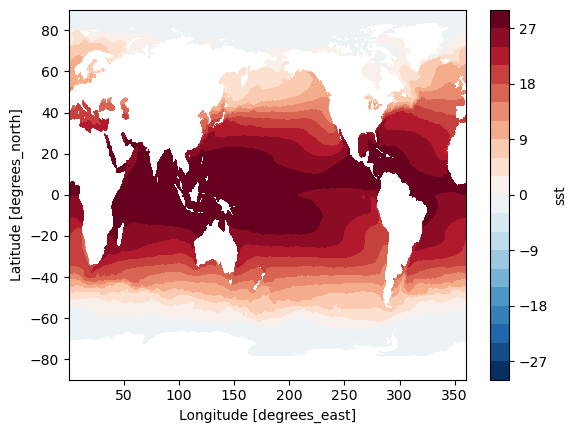

In [69]:
ds['sst'].mean("time").plot.contourf(levels = range(-30, 31, 3))

Now we can see its longitudes are not properly aligned, so let's correct those

In [70]:
def align_coords(ds):
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds = ds.sortby(["lat", "lon"])
    return ds

In [72]:
ds = align_coords(ds)

In [73]:
ds

<xarray.Dataset>
Dimensions:  (time: 1826, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2015-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:50:24 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....

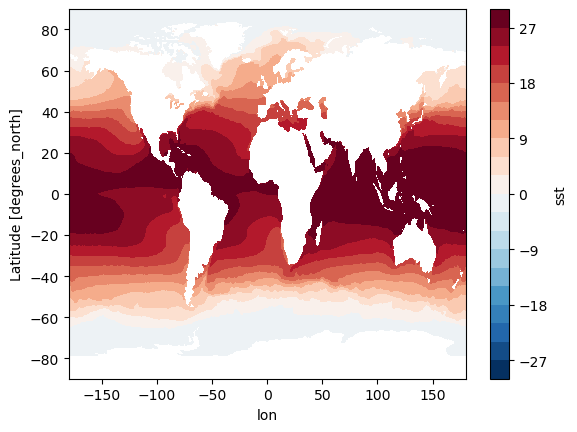

In [74]:
ds['sst'].mean("time").plot.contourf(levels = range(-30, 31, 3))

In [81]:
sst = ds.sst

This is time series of lon = slice(90,140), lat = slice(-12,8)

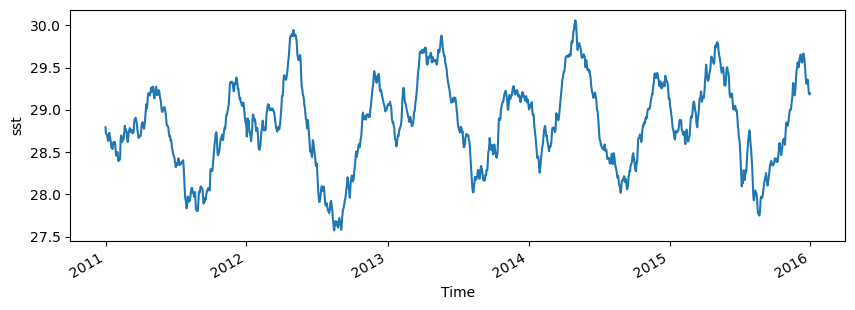

In [85]:
sst.sel(lon = slice(90,140), lat = slice(-12,8)).mean(['lat','lon']).plot(figsize = [10, 3])

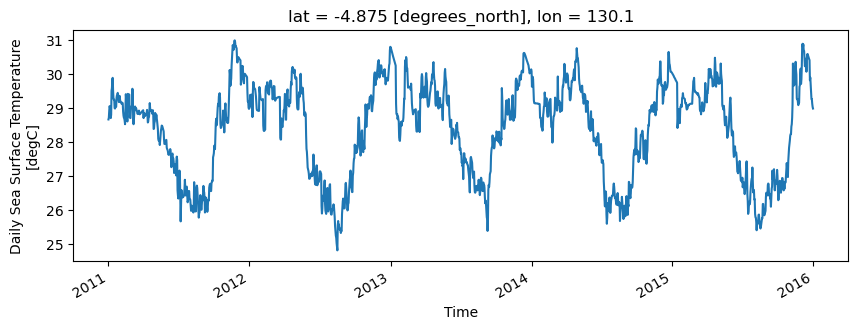

In [92]:
sst.sel(lon = 130, lat = -5, method = "nearest").plot(figsize = [10, 3])

Lets plot temporal mean plot

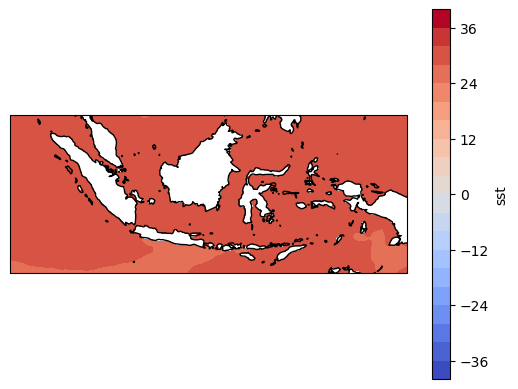

In [89]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree())
sst.sel(lon = slice(90,140), lat = slice(-12,8)).mean("time").plot.contourf(ax = ax,
                                                                                   levels = range(-40, 41, 4),
                                                                                   cmap = "coolwarm")
ax.coastlines()